In [ ]:
pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
pip install table_evaluator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.


In [ ]:
import pandas as pd

from sdmetrics.reports.single_table import QualityReport
from ctgan import CTGAN

from rdt import HyperTransformer

In [ ]:
real_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
df = pd.DataFrame(real_data)

print(df.columns)

print("Original DataFrame:")
print(df)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Original DataFrame:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.63051

In [ ]:
NUM_ROWS = 200000
NUM_EPOCHS = 1000
BATCH_SIZE = 1500

In [ ]:
ht = HyperTransformer()
ht.detect_initial_config(data = df)
detected_config = ht.get_config()
display(detected_config)

{
    "sdtypes": {
        "Time": "numerical",
        "V1": "numerical",
        "V2": "numerical",
        "V3": "numerical",
        "V4": "numerical",
        "V5": "numerical",
        "V6": "numerical",
        "V7": "numerical",
        "V8": "numerical",
        "V9": "numerical",
        "V10": "numerical",
        "V11": "numerical",
        "V12": "numerical",
        "V13": "numerical",
        "V14": "numerical",
        "V15": "numerical",
        "V16": "numerical",
        "V17": "numerical",
        "V18": "numerical",
        "V19": "numerical",
        "V20": "numerical",
        "V21": "numerical",
        "V22": "numerical",
        "V23": "numerical",
        "V24": "numerical",
        "V25": "numerical",
        "V26": "numerical",
        "V27": "numerical",
        "V28": "numerical",
        "Amount": "numerical",
        "Class": "numerical"
    },
    "transformers": {
        "Time": FloatFormatter(),
        "V1": FloatFormatter(),
        "V2": FloatFor

In [ ]:
ht.fit(df)
transformed_df = ht.transform(df)
transformed_df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
284802    0.0  
284803    0.0  
284804    0.0  
284805    0.0  
284806    0.0  

[284807 rows x 31 columns]

In [ ]:
import time
import torch as torch

start_time = time.time()  # Capture start time before training

# model = CTGAN(
#     epochs=NUM_EPOCHS,
#     verbose=True,
#     batch_size=BATCH_SIZE,
#     embedding_dim = 1024,
#     discriminator_steps = 6,
#     discriminator_dim = (512,512)
# )

model = torch.load("/content/drive/MyDrive/Colab Notebooks/credit_1000epcohs_1500BS_1024_6_512_Score98.pkl")
# model.fit(transformed_df)

# Training is finished, record end time
end_time = time.time()

# Calculate total training time in seconds
training_time = end_time - start_time

print(f"Training completed! Total time taken: {training_time:.2f} seconds")

#model.save("/content/drive/MyDrive/Colab Notebooks/creditcard_1000epochs_1500BS_1024_6_512.pkl")

<ipython-input-10-bc9764ba7898>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/content/drive/MyDrive/Colab Notebooks/credit_1000epcohs_1500BS_1024_6_

Training completed! Total time taken: 0.80 seconds


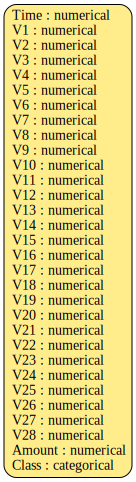

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata_dict= metadata.to_dict()
metadata.visualize()

In [ ]:
categorical_columns = [column for column, info in metadata_dict['columns'].items() if info['sdtype'] == 'categorical']
print(categorical_columns)

['Class']


In [ ]:
from sdmetrics.reports.single_table import QualityReport

# Get Synthetic data
synthetic_data = model.sample(NUM_ROWS)
# reverse transform the data
synthetic_data = ht.reverse_transform(synthetic_data)

report = QualityReport()
# Use the metadata OBJECT instead of the dictionary
report.generate(df, synthetic_data, metadata.to_dict())

cs_report = report.get_details(property_name="Column Shapes")
print(cs_report)

fig1 = report.get_visualization(property_name='Column Shapes')
#fig1.update_layout(height = 1600,width=1600, margin=dict(l=400, r=400, t=400, b=400))
fig1.show()

# Create the second figure
fig2 = report.get_visualization(property_name='Column Pair Trends')
#fig2.update_layout(height = 1600,width=1600,margin=dict(l=400, r=400, t=400, b=400))
fig2.show()

#print(fig1)

#fig1.write_image("/content/drive/MyDrive/Colab Notebooks/hey.pdf",engine='kaleido')

report.save(filepath='/content/drive/MyDrive/Colab Notebooks/creditcard_report_1000epochs_1500BS_1024_6_512.pkl')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:07<00:00,  4.08it/s]|
Column Shapes Score: 97.72%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:10<00:00,  6.63it/s]|
Column Pair Trends Score: 94.32%

Overall Score (Average): 96.02%

    Column        Metric     Score
0     Time  KSComplement  0.982020
1       V1  KSComplement  0.977771
2       V2  KSComplement  0.973498
3       V3  KSComplement  0.978161
4       V4  KSComplement  0.981967
5       V5  KSComplement  0.985304
6       V6  KSComplement  0.972476
7       V7  KSComplement  0.977240
8       V8  KSComplement  0.985779
9       V9  KSComplement  0.975695
10     V10  KSComplement  0.980828
11     V11  KSComplement  0.984008
12     V12  KSComplement  0.978928
13     V13  KSComplement  0.988929
14     V14  KSComplement  0.958270
15     V15  KSComplement  0.983798
16     V16  KSComplement  0.980418
17     V17  KSComplement  0.984791
18     V18  KSComplement  0.980035
19     V19  KSComple

In [ ]:
from sdmetrics.single_column import CSTest

for column in categorical_columns:
    cstest_result = CSTest.compute(
        real_data=df[column],
        synthetic_data=synthetic_data[column]
    )
    print(f"CSTest for column {column}: {cstest_result}")

CSTest for column Class: 0.9668183876821032


In [ ]:
from sdmetrics.visualization import get_column_plot

# Loop through each column in the dataframe
for column in df.columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=synthetic_data,
        column_name=column,
    )

    fig.show()

In [ ]:
display(synthetic_data)

Time        V1        V2        V3        V4        V5  \
0        91056.695925 -1.723675  0.852592  1.599076  0.977421 -0.634219   
1       120555.770719  0.945667 -1.694904 -0.643204  0.456008 -1.675624   
2        19211.431375  1.089114 -0.103770 -0.431534  0.777430 -0.160552   
3       168567.683800 -1.639630 -0.271536  1.116587 -1.249007 -0.296331   
4        84286.992834  1.037571 -0.088699  0.630343  2.768153 -1.362145   
...               ...       ...       ...       ...       ...       ...   
199995   50834.196072  1.425029 -1.659942 -1.288374 -1.254835 -0.472430   
199996  168700.521584  2.012798  0.332498 -1.122220  1.470186  0.342357   
199997   11877.219890  1.331357 -1.351277 -0.153055 -0.929973  0.875562   
199998    8362.860422 -0.311491  0.889564  0.920301 -0.717985  0.464777   
199999   53088.791102 -0.301108  0.956909  1.415510  1.655014  0.846881   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.057729  0.389300  0.349830 -0.454323  ...  0.029519  0.143773   
1       0.235145 -0.794688  0.651628  0.761526  ...  0.443907  0.203245   
2       0.708622 -0.166989  1.038936 -0.766063  ...  0.231437  0.403516   
3       0.019261  0.137442  0.520939  0.053335  ...  0.446310  1.022763   
4      -0.232675 -0.791321  0.199302 -0.120581  ...  0.260395  0.103423   
...          ...       ...       ...       ...  ...       ...       ...   
199995 -1.367811 -0.365032 -0.170695 -0.623026  ...  0.091133 -0.405730   
199996 -0.949444  0.326096 -0.309645  0.331347  ... -0.286460 -0.502850   
199997  4.016801 -0.981481  0.389933  0.379197  ... -0.017242 -0.286952   
199998 -0.700066  0.307352  0.006580  1.573938  ...  0.295324  1.186391   
199999 -1.179035  1.363445 -0.401781 -0.804008  ...  0.177855  0.231027   

             V23       V24       V25       V26       V27       V28  \
0      -0.115416 -0.034667  0.831783 -0.138636 -0.034101  0.101181   
1      -0.225862  0.050794 -0.466531 -0.403032 -0.085562 -0.127943   
2      -0.121254 -1.024428  0.390396 -0.076916 -0.001007  0.027216   
3       0.194034 -1.367300 -0.002678  0.138458  0.153668  0.083657   
4       0.025870  0.836752  0.611570  0.143727  0.002615 -0.031722   
...          ...       ...       ...       ...       ...       ...   
199995 -0.057501 -0.846374  0.318975 -0.145565 -0.026676 -0.038015   
199996  0.349740  0.936146 -0.403243  0.243655  0.036160 -0.078693   
199997 -0.216123  1.131758  0.852448  1.157728 -0.123695  0.020533   
199998 -0.262274 -0.485956  0.072655  0.349839  0.191008  0.000413   
199999 -0.177608 -0.929142  0.624990 -0.627082  0.078958  0.015175   

            Amount  Class  
0        45.262079      0  
1       356.333762      0  
2         3.893122      0  
3        41.285843      0  
4        17.023624      0  
...            ...    ...  
199995   23.690251      0  
199996    3.711888      0  
199997    4.403507      0  
199998    3.254439      0  
199999    8.512304      0  

[200000 rows x 31 columns]

In [ ]:
# from itertools import combinations
# from matplotlib.backends.backend_pdf import PdfPages

# # Get all column pairs
# column_pairs = combinations(df.columns, 2)

# # Loop through each column pair
# for column1, column2 in column_pairs:
#   # Generate the plot using get_column_pair_plot
#   fig = get_column_pair_plot(
#       real_data=df,
#       synthetic_data=synthetic_data,
#       column_names=[column1, column2]
#   )


#   fig.show()


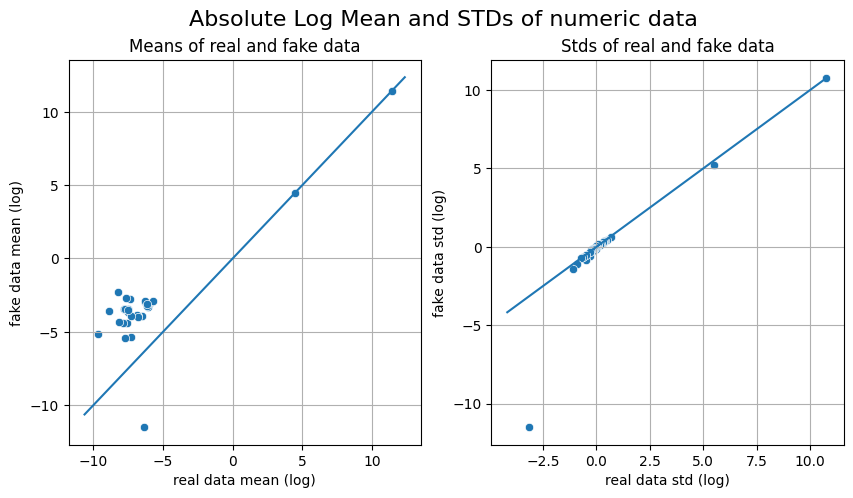

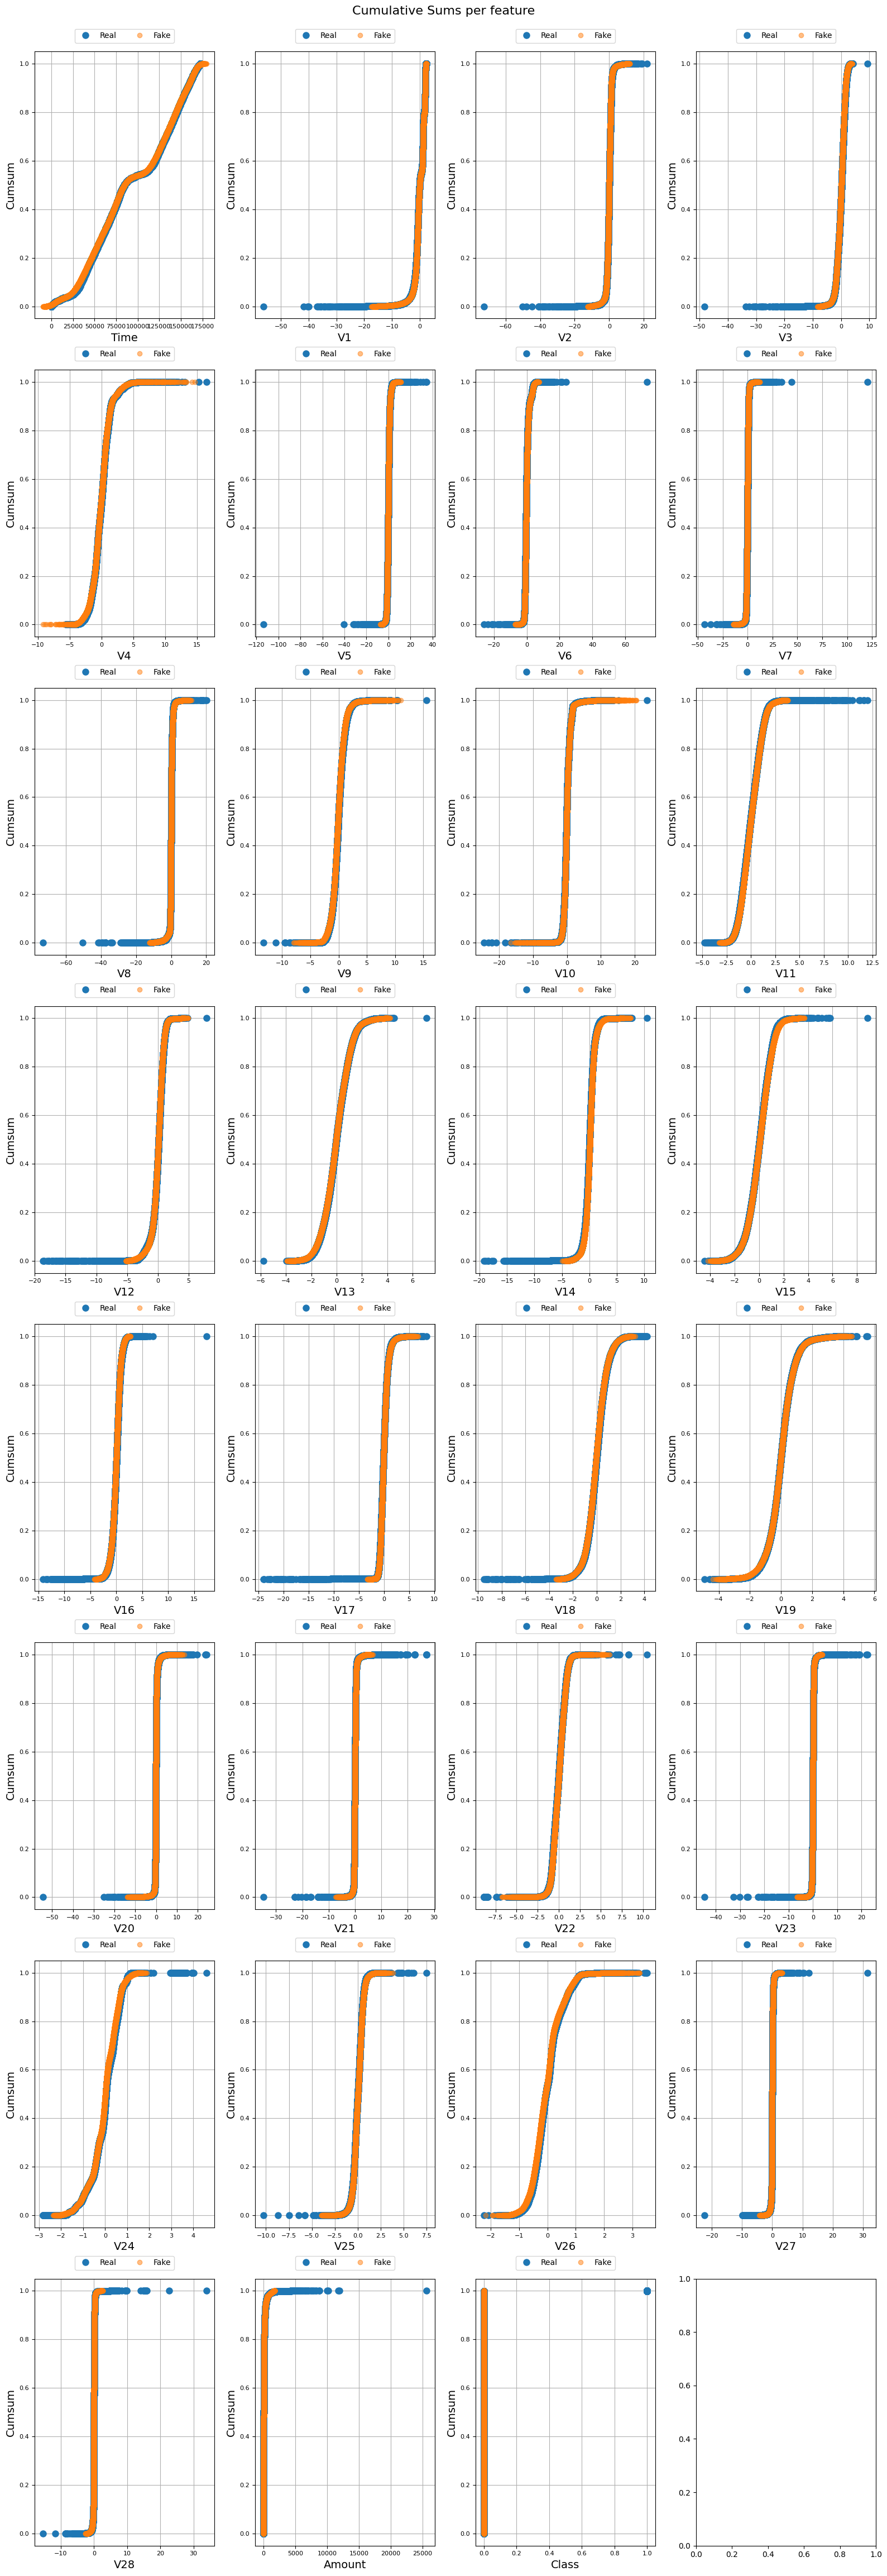

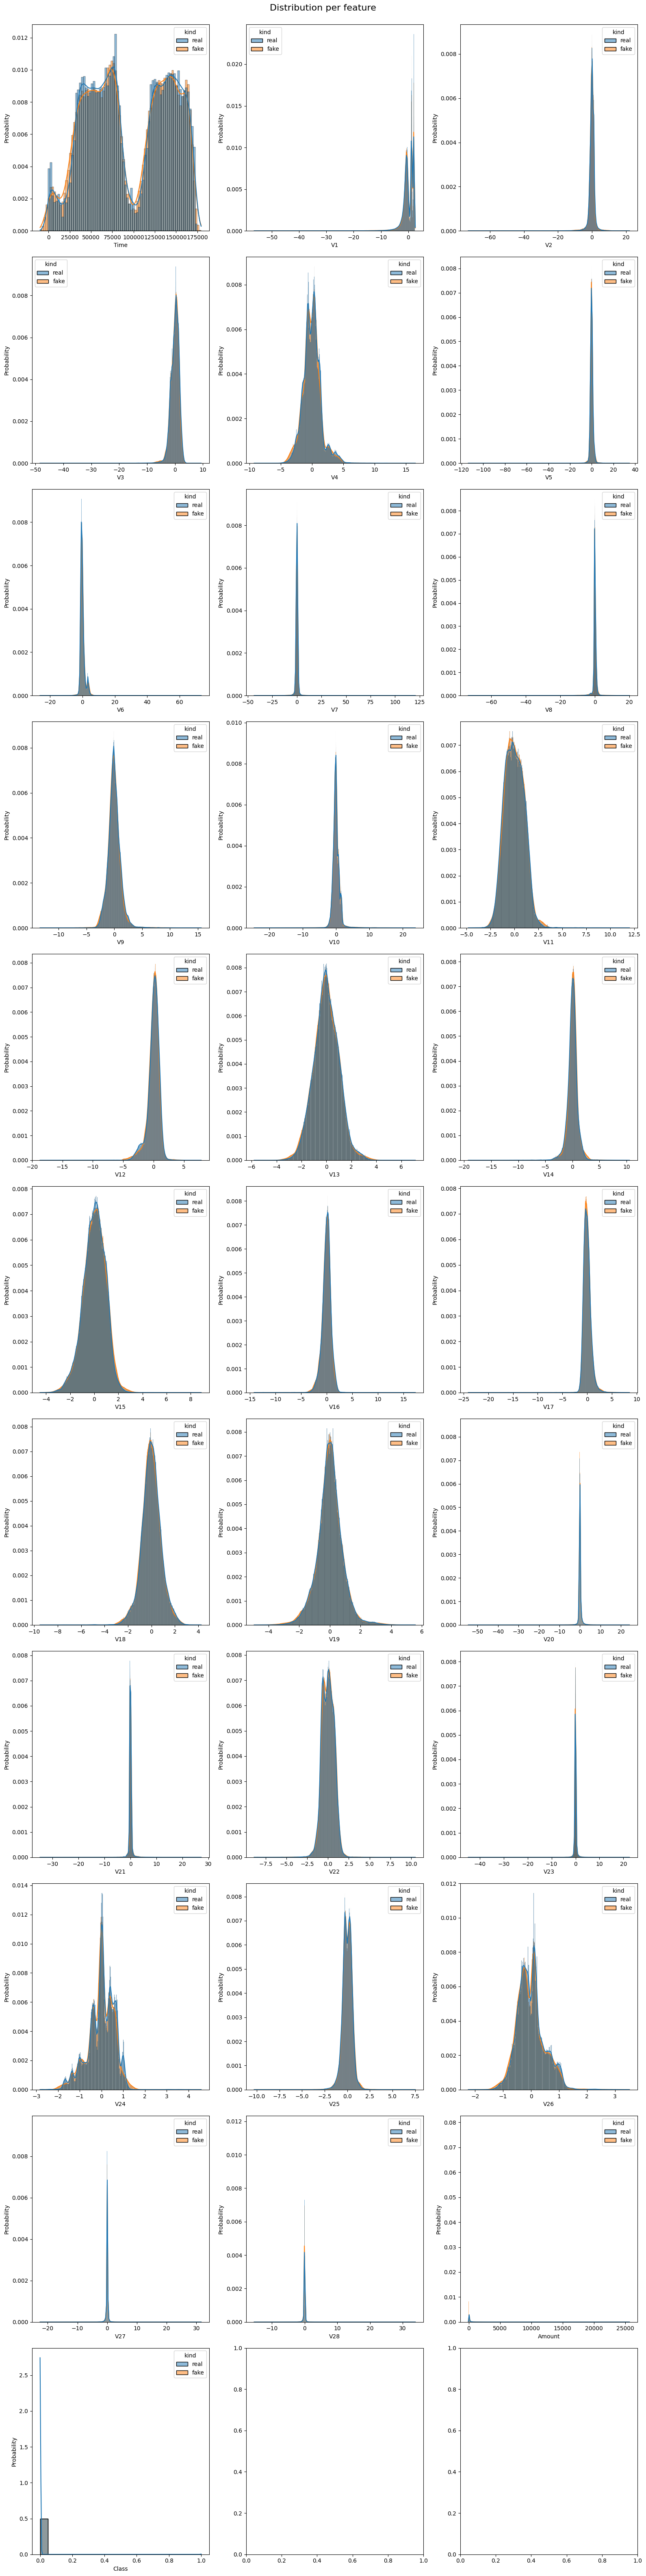

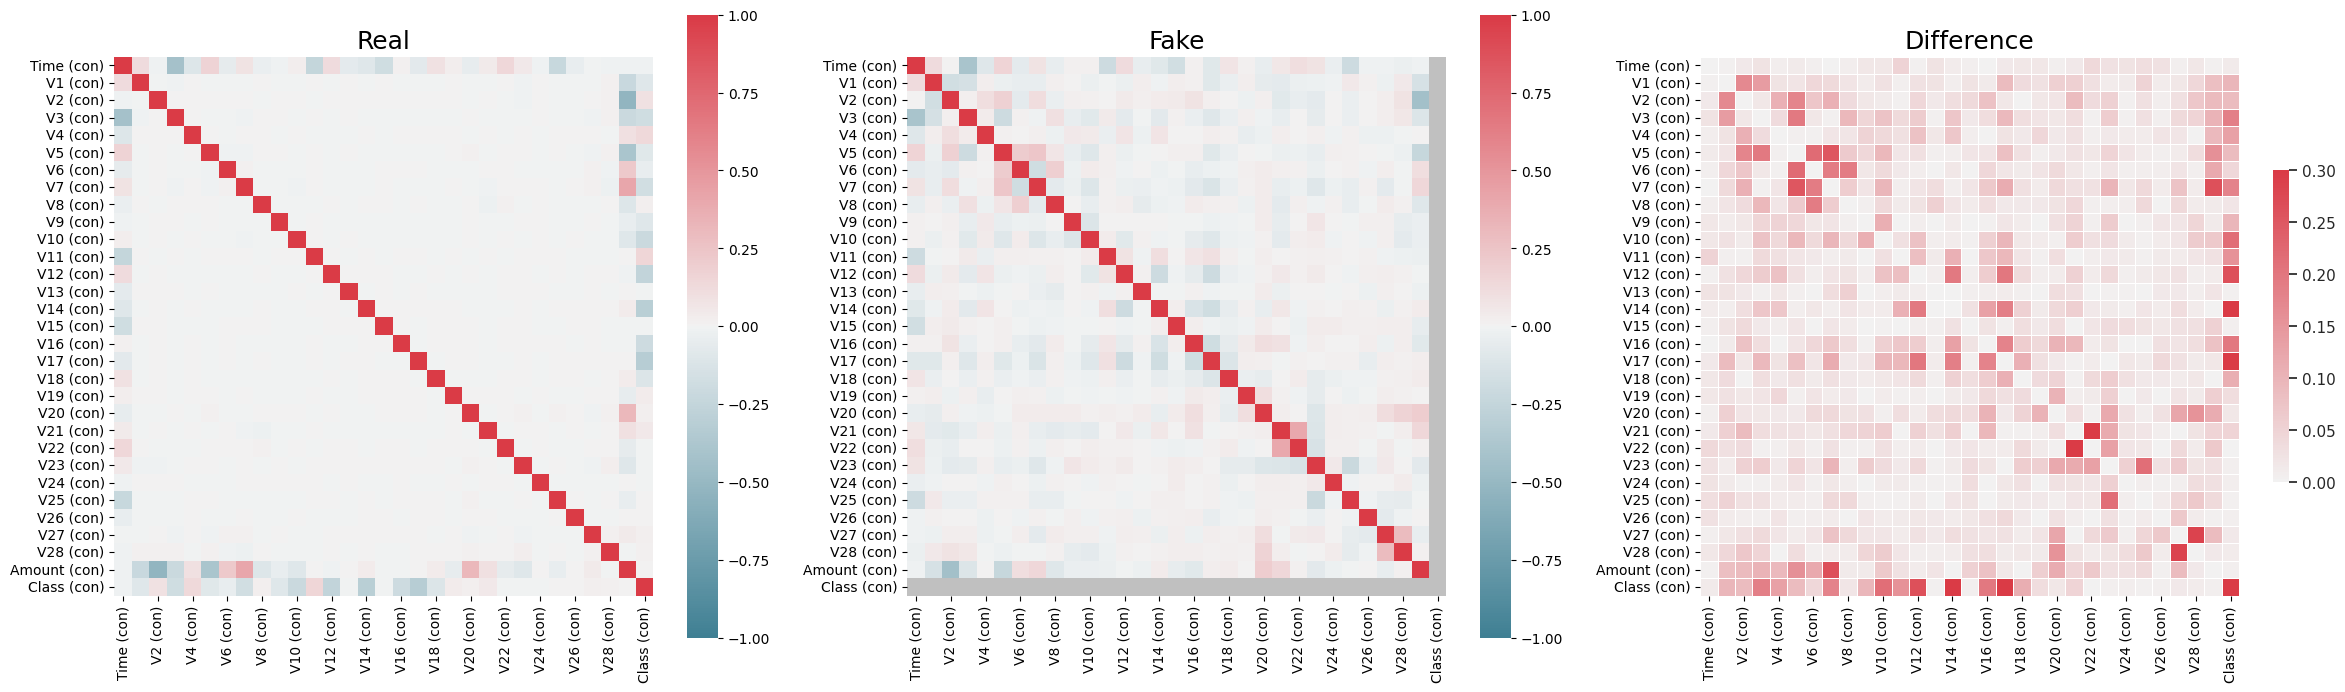

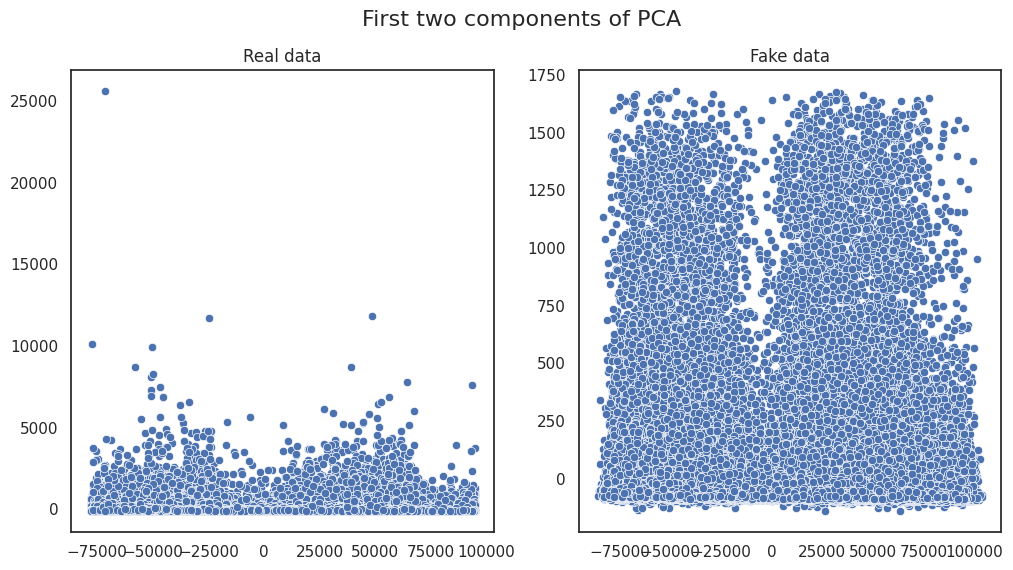

In [ ]:
from table_evaluator import TableEvaluator

# Assuming real_data and synthetic_data are pandas DataFrames
table_evaluator = TableEvaluator(df, synthetic_data)

table_evaluator.visual_evaluation()

In [ ]:
syn_df = pd.DataFrame(synthetic_data)

LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df_without_species = transformed_df.drop(columns=['Species'])
df_without_species.dropna()

KeyError: "['Species'] not found in axis"

In [ ]:
X_train_old,X_test_old,Y_train_old,Y_test_old = train_test_split(df_without_species,transformed_df['Species'],test_size=0.2,random_state=0)

In [ ]:
new_df = ht.transform(syn_df)
new_df_without_species = new_df.drop(columns=['Species'])

In [ ]:
X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(new_df_without_species,new_df['Species'],test_size=0.2,random_state=0)

In [ ]:
model_old = LinearRegression()
model_old.fit(X_train_old,Y_train_old)

In [ ]:
# Trained on original data and tested on original data
score_old_old = model_old.score(X_test_old,Y_test_old)
print(f"The coefficient of determination is: {score_old_old:.6f}")

In [ ]:
#Trained on original data and Testing on new Data
score_old_new = model_old.score(X_test_new,Y_test_new)
print(f"The coefficient of determination is: {score_old_new:.6f}")

In [ ]:
#Training on new data
model_new = LinearRegression()
model_new.fit(X_train_new,Y_train_new)

In [ ]:
#trained on new data and tested on Old data
score_new_old = model_new.score(X_test_old,Y_test_old)
print(f"The coefficient of determination is: {score_new_old:.6f}")

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib
# Split the data into train and test sets

label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy['Diagnosis_encoded'] = label_encoder.fit_transform(df_copy['Species'])

X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(df_without_species, df_copy['Diagnosis_encoded'], test_size=0.2, random_state=42)

In [ ]:
syn_df['Diagnosis_encoded'] = label_encoder.fit_transform(syn_df['Species'])

X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(new_df_without_species,syn_df['Diagnosis_encoded'],test_size=0.2,random_state=0)

In [ ]:
log_reg_old = LogisticRegression()
log_reg_old.fit(X_train_old, y_train_old)

#Trained on original data and tested on original data
score_old_old = log_reg_old.score(X_test_old, y_test_old)
print(f"The coefficient of determination is: {score_old_old:.6f}")

In [ ]:
#Trained on original data and tested on new data
score_old_new = log_reg_old.score(X_test_new, Y_test_new)
print(f"The coefficient of determination is: {score_old_new:.6f}")

In [ ]:
log_reg_new = LogisticRegression()
log_reg_new.fit(X_train_new, Y_train_new)

#Trained on new data and tested on original data
score_new_old = log_reg_new.score(X_test_old, y_test_old)
print(f"The coefficient of determination is: {score_new_old:.6f}")